In [80]:
import pandas as pd
import seaborn as sns

In [81]:
df=pd.read_csv(r"C:\Users\harsh\datasets\IRIS.csv")

In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [85]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


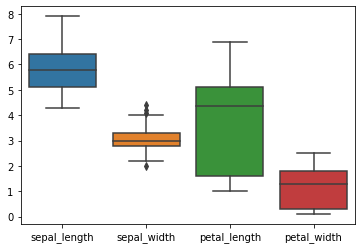

In [87]:
sns.boxplot(data=df)

In [88]:
from scipy import stats
import numpy as np

In [89]:
ds=df.drop("species",axis=1)

In [90]:
z=np.abs(stats.zscore(ds))
ds=ds[(z<3).all(axis=1)]

In [91]:
print(ds)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
16            5.4          3.9           1.3          0.4
17            

In [92]:
p=df["species"]
ds=pd.concat([ds,p],axis=1)
print(ds)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [102]:
ds=ds.dropna()
print(ds)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [103]:
ds.head()
x=ds.drop('species',axis=1)
y=ds['species']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=3)

In [108]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [109]:
p=knn.predict(X_test)

In [110]:
from sklearn import metrics

In [111]:
metrics.confusion_matrix(p,Y_test)

array([[16,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 10]], dtype=int64)

In [112]:
print(metrics.classification_report(p,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.83      0.88        18
 Iris-virginica       0.77      0.91      0.83        11

       accuracy                           0.91        45
      macro avg       0.90      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



In [113]:
print(metrics.accuracy_score(p,Y_test))

0.9111111111111111
